In [1]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree

In [2]:
df1 = pd.read_csv('./data_all/online_data_all')
df2 = pd.read_csv('./data_2012/online_data_2012')
df3 = pd.read_csv('./data_2011/online_data_2011')
df4 = pd.read_csv('./data_2010/online_data_2010')
df5 = pd.read_csv('./data_2009/online_data_2009')
df6 = pd.read_csv('./data_2008/online_data_2008')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
df.drop_duplicates('movies',keep='first')

,movies,grade,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews,audience_cnt
0,7번방의 선물,9.53,710,52,762,953,41,994,12811435
1,감기,7.83,1336,683,2019,635,283,918,3117859
2,감시자들,8.34,839,248,1087,286,167,453,5508359
3,결혼전야,8.86,313,84,397,113,35,148,1214839
4,고령화 가족,8.81,237,58,295,89,49,138,1141222
5,공범,9.00,280,49,329,97,89,186,1766285
6,관상,9.51,1467,111,1578,666,328,994,9135806
7,깡철이,9.06,578,85,663,336,128,464,1209363
8,나우 유 씨 미 : 마술사기단,9.38,343,44,387,588,150,738,2718237
9,남자사용설명서,8.91,932,174,1106,511,70,581,507913


In [5]:
df.set_index('movies',inplace=True)

In [6]:
df

,grade,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews,audience_cnt
movies,,,,,,,,
7번방의 선물,9.53,710,52,762,953,41,994,12811435
감기,7.83,1336,683,2019,635,283,918,3117859
감시자들,8.34,839,248,1087,286,167,453,5508359
결혼전야,8.86,313,84,397,113,35,148,1214839
고령화 가족,8.81,237,58,295,89,49,138,1141222
공범,9.00,280,49,329,97,89,186,1766285
관상,9.51,1467,111,1578,666,328,994,9135806
깡철이,9.06,578,85,663,336,128,464,1209363
나우 유 씨 미 : 마술사기단,9.38,343,44,387,588,150,738,2718237


In [7]:
X = df[ df.columns[1:7] ]
X.head()

,p_breviews,n_breviews,breviews,p_reviews,n_reviews,reviews
movies,,,,,,
7번방의 선물,710,52,762,953,41,994
감기,1336,683,2019,635,283,918
감시자들,839,248,1087,286,167,453
결혼전야,313,84,397,113,35,148
고령화 가족,237,58,295,89,49,138


In [8]:
y = df['audience_cnt']
y.head()

movies
7번방의 선물    12811435
감기          3117859
감시자들        5508359
결혼전야        1214839
고령화 가족      1141222
Name: audience_cnt, dtype: int64

In [9]:
def func(x) :
    if 3000000 > int(x) :
        return 1
   
    if 3000000 <= int(x) < 5000000 :
        return 2
     
    if 5000000 <= int(x):
        return 3

In [10]:
y = y.apply(func)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=.2 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(719, 6) (180, 6) (719,) (180,)


In [13]:
sc = StandardScaler()
sc.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [15]:
movie_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
movie_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [16]:
from sklearn.metrics import accuracy_score

y_pred_tr = movie_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.84


In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [20]:
dot_data = export_graphviz(movie_tree, out_file=None, feature_names=['p_breviews', 'n_breviews','breviews','p_reviews','n_reviews','reviews'],
                          class_names=['1','2','3'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

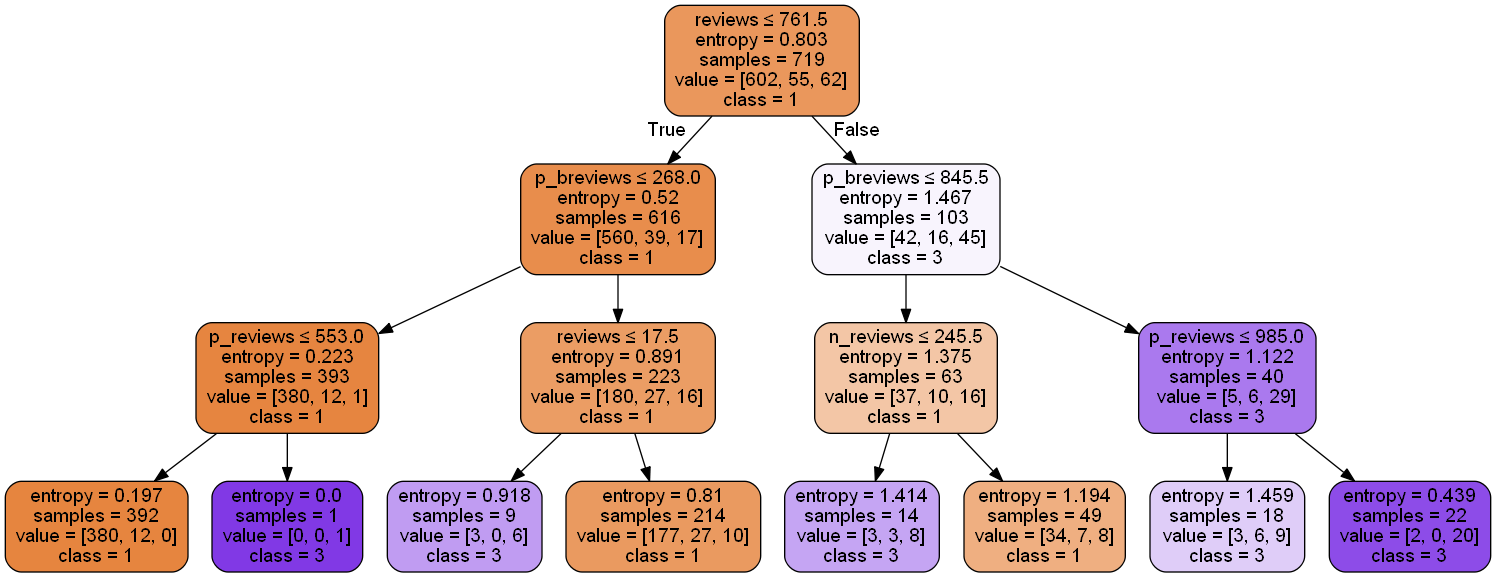

In [21]:
Image(graph.create_png())